In [1]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from tqdm import tqdm, trange
from sklearn.metrics import confusion_matrix
from scipy.stats import poisson, norm
from sklearn.decomposition import PCA
import sys
sys.path.append("/home/camp/warnert")
sys.path.append("/home/camp/warnert/working/Recordings/binary_pulses/blip_manuscript")
import blip_analysis_manu as ba
import exp_blip_models_manu as em
import daskify
import dask
from scipy.stats import skewnorm, mannwhitneyu
import scipy
import matplotlib
from sklearn.manifold import LocallyLinearEmbedding, MDS
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
from scipy.spatial import distance_matrix
import openephys as oe
from scipy.stats import ttest_ind

b


In [2]:
unit_usrt1 = ba.get_usrts(1)
unit_usrt2 = ba.get_usrts(3)
unit_usrt3 = ba.get_usrts(5)
good_indexes = ba.get_stable_resp_indexes()

/home/camp/warnert/neurolytics/joined_recording.py:79: UserWarning: Mismatch in repeat lengths, cannot make full numpy array
  warnings.warn('Mismatch in repeat lengths, cannot make full numpy array')


In [3]:
model = em.ExponentialInteractiveModel(unit_usrt1, 0)
trial_array = model.trial_array[:, :5]
conc_count = trial_array.sum(axis=-1)
onset_array = np.zeros((32, 5))
conc_array = np.zeros((32, 5))
dif_array = np
for i in range(32):
    for j in range(5):
        if trial_array[i, j] == 1:
            onset_array[i, j] =1
            break
    if i != 0:
        conc_array[i][conc_count[i]-1] = 1
trial_array_extended = np.append(trial_array[:, :5], np.zeros((32, 1)), axis=1)
trial_array_extended = np.append(np.zeros((32, 1)), trial_array_extended, axis=1)

pos_equiv_change = np.diff(trial_array_extended)
pos_equiv_change[pos_equiv_change < 0] = 0
full_array = np.append(trial_array[:, :5], pos_equiv_change[:, 1:-1], axis=1)
        
joined_array = np.append(onset_array, conc_array, axis=1)
#full_array = np.append(trial_array, dif_array[:, 1:], axis=1)
print(full_array)

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 0. 1. 1. 0. 0. 1. 0. 0.]
 [0. 0. 1. 1. 1. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 1. 1. 0. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 1. 1. 0. 1. 0.]
 [0. 1. 1. 0. 0. 1. 0. 0. 0.]
 [0. 1. 1. 0. 1. 1. 0. 0. 1.]
 [0. 1. 1. 1. 0. 1. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 1. 0.]
 [1. 0. 0. 1. 1. 0. 0. 1. 0.]
 [1. 0. 1. 0. 0. 0. 1. 0. 0.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 1. 0. 0. 1. 0. 0.]
 [1. 0. 1. 1. 1. 0. 1. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 1. 0. 0. 0. 1.]
 [1. 1. 0. 1. 0. 0. 0. 1. 0.]
 [1. 1. 0. 1. 1. 0. 0. 1. 0.]
 [1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 1. 0. 0. 0. 1.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0.]]


In [4]:
scores1_conc = []
scores1_onset = []
scores2_conc = []
scores2_onset = []
scores3_conc = []
scores3_onset = []

preds_conc1 = []
preds_onset1 = []
preds_conc2 = []
preds_onset2 = []
preds_conc3 = []
preds_onset3 = []

scores_cao1 = []
scores_cao2 = []
scores_cao3 = []
scores_full1 = []
scores_full2 = []
scores_full3 = []

preds_cao1 = []
preds_cao2 = []
preds_cao3 = []
preds_full1 = []
preds_full2 = []
preds_full3 = []

models_full1 = []
models_full2 = []
models_full3 = []


for i in trange(145):
    model1_conc = em.ExponentialCustomTrialArray(unit_usrt1, i, conc_array)
    model1_conc.fit()
    scores1_conc.append(model1_conc.fit_score)
    preds_conc1.append(model1_conc.pred_resp)
    
    
    model2_conc = em.ExponentialCustomTrialArray(unit_usrt2, i, conc_array)
    model2_conc.fit()
    scores2_conc.append(model2_conc.fit_score)
    preds_conc2.append(model2_conc.pred_resp)
    
    model3_conc = em.ExponentialCustomTrialArray(unit_usrt3, i, conc_array)
    model3_conc.fit()
    scores3_conc.append(model3_conc.fit_score)
    preds_conc3.append(model3_conc.pred_resp)
    
    model1_onset = em.ExponentialCustomTrialArray(unit_usrt1, i, onset_array)
    model1_onset.fit()
    scores1_onset.append(model1_onset.fit_score)
    preds_onset1.append(model1_onset.pred_resp)
    
    model2_onset = em.ExponentialCustomTrialArray(unit_usrt2, i, onset_array)
    model2_onset.fit()
    scores2_onset.append(model2_onset.fit_score)
    preds_onset2.append(model2_onset.pred_resp)
    
    model3_onset = em.ExponentialCustomTrialArray(unit_usrt3, i, onset_array)
    model3_onset.fit()
    scores3_onset.append(model3_onset.fit_score)
    preds_onset3.append(model3_onset.pred_resp)
    
    model1_cao = em.ExponentialCustomTrialArray(unit_usrt1, i, joined_array)
    model1_cao.fit()
    scores_cao1.append(model1_cao.fit_score)
    preds_cao1.append(model1_cao.pred_resp)
    
    model2_cao = em.ExponentialCustomTrialArray(unit_usrt2, i, joined_array)
    model2_cao.fit()
    scores_cao2.append(model2_cao.fit_score)
    preds_cao2.append(model2_cao.pred_resp)
    
    model3_cao = em.ExponentialCustomTrialArray(unit_usrt3, i, joined_array)
    model3_cao.fit()
    scores_cao3.append(model3_cao.fit_score)
    preds_cao3.append(model3_cao.pred_resp)
    
    model1_full = em.ExponentialCustomTrialArray(unit_usrt1, i, full_array)
    model1_full.fit()
    scores_full1.append(model1_full.fit_score)
    preds_full1.append(model1_full.pred_resp)
    models_full1.append(model1_full)
    
    model2_full = em.ExponentialCustomTrialArray(unit_usrt2, i, full_array)
    model2_full.fit()
    scores_full2.append(model2_full.fit_score)
    preds_full2.append(model2_full.pred_resp)
    models_full2.append(model2_full)
    
    model3_full = em.ExponentialCustomTrialArray(unit_usrt3, i, full_array)
    model3_full.fit()
    scores_full3.append(model3_full.fit_score)
    preds_full3.append(model3_full.pred_resp)
    models_full3.append(model3_full)

100%|██████████| 145/145 [00:31<00:00,  4.62it/s]


In [ ]:
plt.plot(model1_full.opt_out.x)
plt.plot(model2_full.opt_out.x)
plt.plot(model3_full.opt_out.x)

In [ ]:
plt.plot(model3_full.true_resp)
plt.plot(model2_full.true_resp)
plt.plot(model1_full.true_resp)

In [ ]:
print(full_array)

In [5]:
ui = 40
pred_3 = []

for ui in good_indexes:
    model1 = models_full1[ui]
    model2 = models_full2[ui]
    model3 = models_full3[ui]
    ratio_w1 = model1.true_resp[-1]/((model1.true_resp[-1]+model2.true_resp[-1]))
    ratio_w2 = model2.true_resp[-1]/((model1.true_resp[-1]+model2.true_resp[-1]))
    pred_ws = model1.opt_out.x[:-1]*ratio_w1 + model2.opt_out.x[:-1]*ratio_w2
    avg_thresh = (model1.opt_out.x[-1] + model2.opt_out.x[-1])/2
    pred_out = pred_ws @ full_array[-1]
    scale = (np.log(model3.true_resp[-1]) - avg_thresh)/pred_out
    pred_ws = scale*pred_ws
    pred_ws = list(pred_ws) + [avg_thresh]
    model_test = em.ExponentialCustomTrialArray(unit_usrt3, ui, full_array)
    model_test.fit(W=pred_ws)
    pred_3.append(model_test.fit_score)

In [5]:
def pred_other_odour(model1, model2, model3, unit_usrt, ui, pred_trial = -1, ratio_schema = 'pred_trial'):
    if ratio_schema == 'pred_trial':
        ratio_w1 = model1.true_resp[-1]/((model1.true_resp[-1]+model2.true_resp[-1]))
        ratio_w2 = model2.true_resp[-1]/((model1.true_resp[-1]+model2.true_resp[-1]))
    elif ratio_schema == 'mean':
        ratio_w1 = np.mean(model1.true_resp)/((np.mean(model1.true_resp)+np.mean(model2.true_resp)))
        ratio_w2 = np.mean(model2.true_resp)/((np.mean(model1.true_resp)+np.mean(model2.true_resp)))
    elif ratio_schema == 'max':
        if model1.true_resp[-1] > model2.true_resp[-1]:
            ratio_w1 = 1
            ratio_w2 = 0
        else:
            ratio_w1 = 0
            ratio_w2 = 1
    pred_ws = model1.opt_out.x[:-1]*ratio_w1 + model2.opt_out.x[:-1]*ratio_w2
    avg_thresh = (model1.opt_out.x[-1] + model2.opt_out.x[-1])/2
    pred_out = pred_ws @ full_array[pred_trial]
    scale = (np.log(model3.true_resp[pred_trial]) - avg_thresh)/pred_out
    pred_ws = scale*pred_ws
    pred_ws = list(pred_ws) + [avg_thresh]
    model_test = em.ExponentialCustomTrialArray(unit_usrt, ui, full_array)
    model_test.fit(W=pred_ws)
    return model_test

In [25]:
fit_scores1 = [models_full1[i].fit_score for i in good_indexes]
fit_scores2 = [models_full2[i].fit_score for i in good_indexes]
fit_scores3 = [models_full3[i].fit_score for i in good_indexes]
all_fit_scores = np.concatenate([fit_scores1, fit_scores2, fit_scores3])

In [6]:
pred_models1 = [pred_other_odour(models_full2[ui], models_full3[ui], models_full1[ui], unit_usrt1, ui) for ui in good_indexes]

pred_models2 = [pred_other_odour(models_full1[ui], models_full3[ui], models_full2[ui], unit_usrt2, ui) for ui in good_indexes]
pred_models3 = [pred_other_odour(models_full2[ui], models_full1[ui], models_full3[ui], unit_usrt3, ui) for ui in good_indexes]

In [7]:
pred_models1_fits = [pred_other_odour(models_full2[ui], models_full3[ui], models_full1[ui], unit_usrt1, ui).fit_score for ui in good_indexes]
pred_models2_fits = [pred_other_odour(models_full1[ui], models_full3[ui], models_full2[ui], unit_usrt2, ui).fit_score for ui in good_indexes]
pred_models3_fits = [pred_other_odour(models_full2[ui], models_full1[ui], models_full3[ui], unit_usrt3, ui).fit_score for ui in good_indexes]

In [37]:
pred_models1_mean = [pred_other_odour(models_full2[ui], models_full3[ui], models_full1[ui], unit_usrt1, ui, ratio_schema='mean') for ui in good_indexes]
pred_models2_mean = [pred_other_odour(models_full1[ui], models_full3[ui], models_full2[ui], unit_usrt2, ui, ratio_schema='mean') for ui in good_indexes]
pred_models3_mean = [pred_other_odour(models_full2[ui], models_full1[ui], models_full3[ui], unit_usrt3, ui, ratio_schema='mean') for ui in good_indexes]

In [67]:
pred_model_scores_trials1 = [[pred_other_odour(models_full2[ui], models_full3[ui], models_full1[ui], unit_usrt1, ui, pred_trial=i).fit_score for i in range(32)] for ui in tqdm(good_indexes)]
pred_model_scores_trials2 = [[pred_other_odour(models_full1[ui], models_full3[ui], models_full2[ui], unit_usrt2, ui, pred_trial=i).fit_score for i in range(32)] for ui in tqdm(good_indexes)]
pred_model_scores_trials3 = [[pred_other_odour(models_full2[ui], models_full1[ui], models_full3[ui], unit_usrt3, ui, pred_trial=i).fit_score for i in range(32)] for ui in tqdm(good_indexes)]

  0%|          | 0/130 [00:00<?, ?it/s]/camp/home/warnert/.conda/envs/intan/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars
/home/camp/warnert/working/Recordings/binary_pulses/exp_blip_models.py:88: RuntimeWarning: invalid value encountered in matmul
  inter_exp = y@W[:-1]+W[-1] # The value inside the exponetial
 11%|█         | 14/130 [00:02<00:25,  4.52it/s]/home/camp/warnert/working/Recordings/binary_pulses/exp_blip_models.py:70: RuntimeWarning: overflow encountered in power
  return np.array([np.power((i-j), 2) for i, j in zip(true_resp, pred_resp)])/vars
 15%|█▌        | 20/130 [00:01<00:10, 10.44it/s]/home/camp/warnert/working/Recordings/binary_pulses/exp_blip_models.py:89: RuntimeWarning: overflow encountered in exp
  pred_firing = np.exp(inter_exp)
/home/camp/warnert/working/Recordings/binary_pulses/exp_blip_models.py:61: RuntimeWarning: invalid value encountered in subtract
  return np.sum(pred_response-true_re

In [58]:
pred_models1_max = [pred_other_odour(models_full2[ui], models_full3[ui], models_full1[ui], unit_usrt1, ui, ratio_schema='max') for ui in good_indexes]
pred_models2_max = [pred_other_odour(models_full1[ui], models_full3[ui], models_full2[ui], unit_usrt2, ui, ratio_schema='max') for ui in good_indexes]
pred_models3_max = [pred_other_odour(models_full2[ui], models_full1[ui], models_full3[ui], unit_usrt3, ui, ratio_schema='max') for ui in good_indexes]

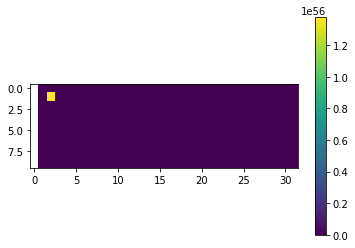

In [50]:
plt.imshow(np.array(pred_model_scores_trials1)[:10])
plt.colorbar()

Text(0, 0.5, 'PFD')

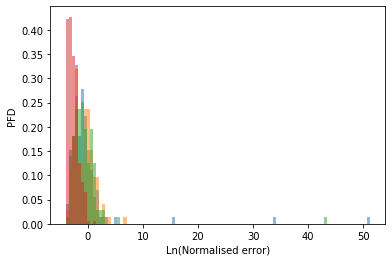

In [29]:
hist =  plt.hist(np.log(pred_models1_fits), bins=100, alpha=0.5, density=True)
plt.hist(np.log(pred_models2_fits), bins=hist[1], alpha=0.5, density=True);
plt.hist(np.log(pred_models3_fits), bins=hist[1], alpha=0.5, density=True);
plt.hist(np.log(all_fit_scores), bins=hist[1], alpha=0.5, density=True);
plt.xlabel('Ln(Normalised error)')
plt.ylabel('PFD')

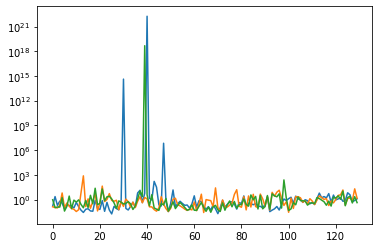

In [19]:
plt.semilogy(pred_models1_fits)
plt.semilogy(pred_models2_fits)
plt.semilogy(pred_models3_fits)

Text(0.5, 0, 'Trials')

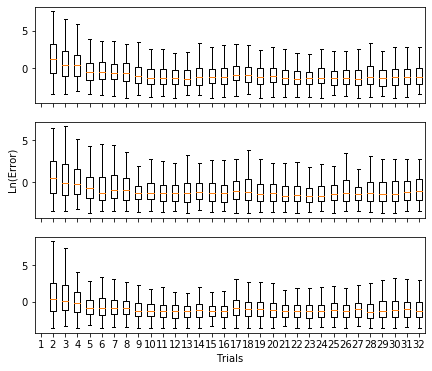

In [73]:
fig = plt.figure(figsize=(7, 6))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
ax1.boxplot(np.log(np.array(pred_model_scores_trials1)), showfliers=False);
ax1.set_xticklabels([])
ax2.boxplot(np.log(np.array(pred_model_scores_trials2)), showfliers=False);
ax2.set_xticklabels([])
ax3.boxplot(np.log(np.array(pred_model_scores_trials3)), showfliers=False);
ax2.set_ylabel('Ln(Error)')
ax3.set_xlabel('Trials')
#ax1.xlabel('Trial label')


Text(0.5, 0, 'Trials')

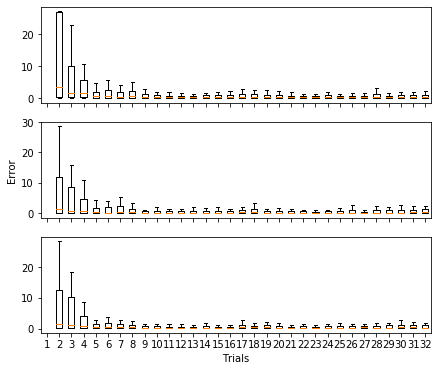

In [75]:
fig = plt.figure(figsize=(7, 6))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
ax1.boxplot(np.array(pred_model_scores_trials1), showfliers=False);
ax1.set_xticklabels([])
ax2.boxplot(np.array(pred_model_scores_trials2), showfliers=False);
ax2.set_xticklabels([])
ax3.boxplot(np.array(pred_model_scores_trials3), showfliers=False);
ax2.set_ylabel('Error')
ax3.set_xlabel('Trials')
#ax1.xlabel('Trial label')


In [83]:
print(np.argmin(np.median(pred_model_scores_trials1, axis=0)[1:])+1)
print(np.argmin(np.median(pred_model_scores_trials2, axis=0)[1:])+1)
print(np.argmin(np.median(pred_model_scores_trials3, axis=0)[1:])+1)

21
23
27


Text(0, 0.5, 'Ln(Error)')

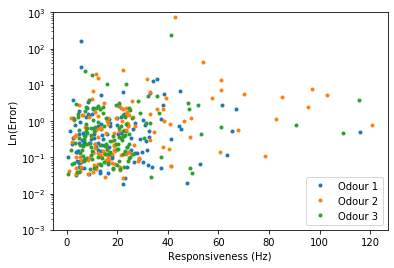

In [8]:
plt.semilogy([i.true_resp[-1] for i in pred_models1], [i.fit_score for i in pred_models1], '.', label='Odour 1')
plt.semilogy([i.true_resp[-1] for i in pred_models2], [i.fit_score for i in pred_models2], '.', label='Odour 2')
plt.semilogy([i.true_resp[-1] for i in pred_models3], [i.fit_score for i in pred_models3], '.', label='Odour 3')
plt.ylim(0.001, 1000)
plt.legend()
plt.xlabel('Responsiveness (Hz)')
plt.ylabel('Ln(Error)')

In [96]:
print(np.corrcoef([i.true_resp[-1] for i in pred_models1], [i.fit_score for i in pred_models1]))
print(np.corrcoef([i.true_resp[-1] for i in pred_models2], [i.fit_score for i in pred_models2]))
print(np.corrcoef([i.true_resp[-1] for i in pred_models3], [i.fit_score for i in pred_models3]))

[[1.         0.31622511]
 [0.31622511 1.        ]]
[[1.         0.05664522]
 [0.05664522 1.        ]]
[[1.         0.09271558]
 [0.09271558 1.        ]]


In [104]:
print(f'{np.corrcoef([models_full2[ui].true_resp[-1] for ui in good_indexes], [i.fit_score for i in pred_models1])[0, 1]}')
print(np.corrcoef([models_full3[ui].true_resp[-1] for ui in good_indexes], [i.fit_score for i in pred_models1])[0, 1])
print(np.corrcoef([models_full1[ui].true_resp[-1] for ui in good_indexes], [i.fit_score for i in pred_models2])[0, 1])
print(np.corrcoef([models_full3[ui].true_resp[-1] for ui in good_indexes], [i.fit_score for i in pred_models2])[0, 1])
print(np.corrcoef([models_full2[ui].true_resp[-1] for ui in good_indexes], [i.fit_score for i in pred_models3])[0, 1])
print(np.corrcoef([models_full1[ui].true_resp[-1] for ui in good_indexes], [i.fit_score for i in pred_models3])[0, 1])
#print(np.corrcoef([models_full2[ui].true_resp[-1] for ui in good_indexes], [i.fit_score for i in pred_models1]))

#print(np.corrcoef([i.true_resp[-1] for i in pred_models3], [i.fit_score for i in pred_models3]))

-0.09300752163656477
-0.054604741445521
0.22667184088286543
0.1658924690953871
0.07837800274659024
-0.014714196929928638


/camp/home/warnert/.conda/envs/intan/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  after removing the cwd from sys.path.


(1.5435561881932504e-07, 100)

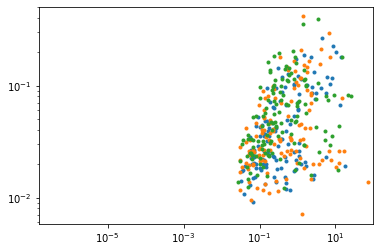

In [33]:
plt.loglog([i.fit_score for i in pred_models1], [models_full1[ui].fit_score for ui in good_indexes], '.')
plt.loglog([i.fit_score for i in pred_models2], [models_full2[ui].fit_score for ui in good_indexes], '.')
plt.loglog([i.fit_score for i in pred_models3], [models_full3[ui].fit_score for ui in good_indexes], '.')
plt.xlim(0, 100)

/camp/home/warnert/.conda/envs/intan/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  after removing the cwd from sys.path.
/camp/home/warnert/.conda/envs/intan/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  """


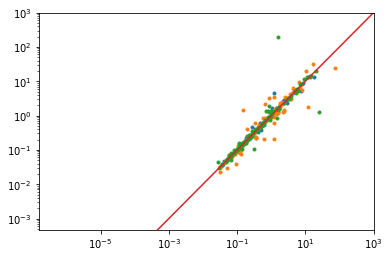

In [43]:
plt.loglog([i.fit_score for i in pred_models1], [i.fit_score for i in pred_models1_mean], '.')
plt.loglog([i.fit_score for i in pred_models2], [i.fit_score for i in pred_models2_mean], '.')
plt.loglog([i.fit_score for i in pred_models3], [i.fit_score for i in pred_models3_mean], '.')
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.plot([0, 1000], [0, 1000])

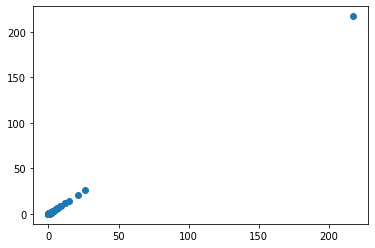

In [30]:
plt.scatter([i.fit_score for i in pred_models3], pred_3)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f02f874f898>,
 'caps': [<matplotlib.lines.Line2D at 0x7f02f874ff98>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f02f874f4a8>,
 'medians': [<matplotlib.lines.Line2D at 0x7f02f875a668>,
 'fliers': [],
 'means': []}

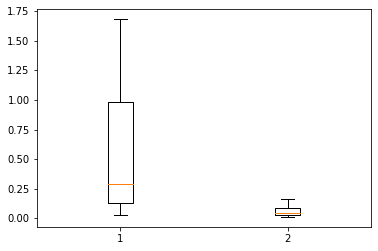

In [35]:
plt.boxplot([[i.fit_score for i in pred_models3], [models_full3[i].fit_score for i in good_indexes]], showfliers=False)

Text(0, 0.5, 'Fit error')

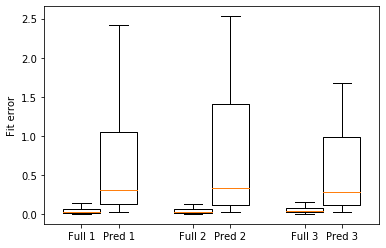

In [56]:
model_full_fits1 = [models_full1[i].fit_score for i in good_indexes]
model_full_fits2 = [models_full2[i].fit_score for i in good_indexes]
model_full_fits3 = [models_full3[i].fit_score for i in good_indexes]

pred_fits1 = [i.fit_score for i in pred_models1]
pred_fits2 = [i.fit_score for i in pred_models2]
pred_fits3 = [i.fit_score for i in pred_models3]

plt.boxplot([model_full_fits1, pred_fits1, model_full_fits2, pred_fits2, model_full_fits3, pred_fits3], positions=[0, 0.5, 1.5, 2, 3, 3.5], showfliers=False);
plt.xticks([0, 0.5, 1.5, 2, 3, 3.5], labels=['Full 1', 'Pred 1', 'Full 2', 'Pred 2', 'Full 3', 'Pred 3'])
plt.ylabel('Fit error')

In [ ]:
prind

Text(0, 0.5, 'Fit error')

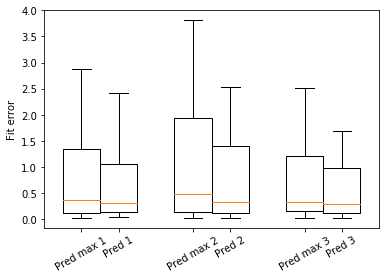

In [62]:
pred_fits_max1 = [i.fit_score for i in pred_models1_max]
pred_fits_max2 = [i.fit_score for i in pred_models2_max]
pred_fits_max3 = [i.fit_score for i in pred_models3_max]

plt.boxplot([pred_fits_max1, pred_fits1, pred_fits_max2, pred_fits2, pred_fits_max3, pred_fits3], positions=[0, 0.5, 1.5, 2, 3, 3.5], showfliers=False);
plt.xticks([0, 0.5, 1.5, 2, 3, 3.5], labels=['Pred max 1', 'Pred 1', 'Pred max 2', 'Pred 2', 'Pred max 3', 'Pred 3'], rotation=30)
plt.ylabel('Fit error')

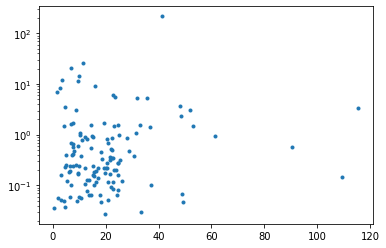

In [75]:
plt.semilogy([models_full3[i].true_resp[-1] for i in good_indexes], pred_3, '.')

In [9]:
print(np.log(model1.pred_resp[-1])-model1.opt_out.x[-1])
print(model1.opt_out.x[:-1] @ full_array[-1])

print(np.log(model3.true_resp[-1]))
print((pred_ws @ full_array[-1] + avg_thresh))
print(scale)

-0.01829367425971995
-0.018293674259719853
3.1282214566000697


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 9 is different from 10)

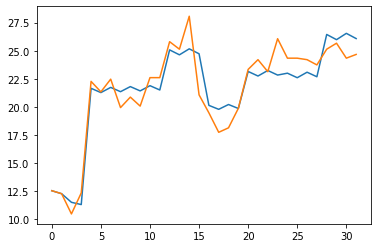

In [21]:
plt.plot(model1.pred_resp)
plt.plot(model1.true_resp)

[ 0.57574844  0.0860923   0.09058927 -0.00221275 -0.01348146  0.56924738
  0.50500054  0.06657613 -0.03938666]
[ 0.20563402  0.03074868  0.03235482 -0.0007903  -0.00481503  0.2033121
  0.18036573  0.0237783  -0.01406732] 0.35715948360986516
10


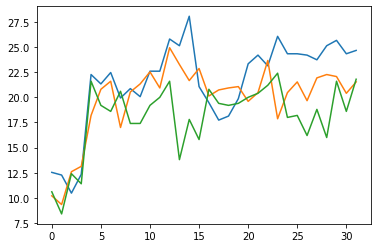

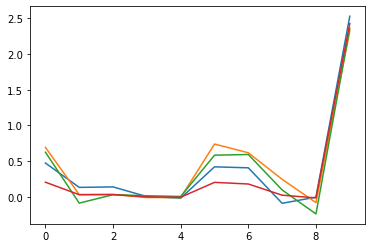

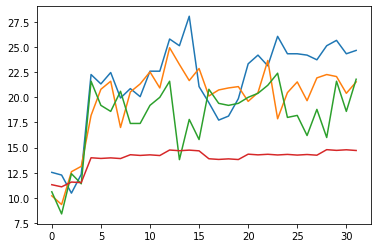

In [8]:
ui = 40

plt.plot(models_full1[ui].true_resp)
plt.plot(models_full2[ui].true_resp)
plt.plot(models_full3[ui].true_resp)
ratio_w1 = models_full1[ui].true_resp[-1]/(models_full1[ui].true_resp[-1] + models_full2[ui].true_resp[-1])
ratio_w2 = models_full2[ui].true_resp[-1]/(models_full1[ui].true_resp[-1] + models_full2[ui].true_resp[-1])
pred_ws = models_full1[ui].opt_out.x[:-1]*ratio_w1 + models_full2[ui].opt_out.x[:-1]*ratio_w2 
print(pred_ws)
pred_ws_sum = sum(pred_ws) #+ (models_full1[ui].opt_out.x[-1] + models_full2[ui].opt_out.x[-1])/2
pred_ws_scale = (np.log(models_full3[ui].true_resp[-1]) - (models_full1[ui].opt_out.x[-1] + models_full2[ui].opt_out.x[-1])/2)/pred_ws_sum
pred_ws_scale = pred_ws_scale
#pred_ws_scale = (pred_ws_sum - (models_full1[ui].opt_out.x[-1] + models_full2[ui].opt_out.x[-1])/2)/np.log(models_full3[ui].true_resp[-1])
pred_ws = pred_ws*pred_ws_scale
print(pred_ws, pred_ws_scale)
pred_ws = list(pred_ws) + [(models_full1[ui].opt_out.x[-1] + models_full2[ui].opt_out.x[-1])/2]
print(len(pred_ws))
full_array_1 = np.append(full_array, np.ones((32, 1)), axis=-1)
model_test = em.ExponentialCustomTrialArray(unit_usrt3, ui, full_array)
model_test.fit(W=pred_ws)

#pred_ws = ((models_full1[ui].opt_out.x[:-1]/max1 * ratio_w1 + models_full1[ui].opt_out.x[:-1]/max1 * ratio_w2) - models_full1[ui].opt_out.x[-1])*np.log(models_full3[ui].true_resp[-1])
plt.figure()
plt.plot(models_full1[ui].opt_out.x)
plt.plot(models_full2[ui].opt_out.x)
plt.plot(models_full3[ui].opt_out.x)

plt.plot(pred_ws)
plt.figure()
plt.plot(models_full1[ui].true_resp)
plt.plot(models_full2[ui].true_resp)
plt.plot(models_full3[ui].true_resp)
plt.plot(model_test.pred_resp)

In [50]:
print(len(full_array[0]), len(pred_ws))

9 9


In [41]:
print(np.log(1))

0.0
